In [567]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
df = pd.read_csv('churn_rate_prediction.csv')
df.shape

(36992, 25)

In [568]:
# Check tong quan bo du lieu
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [569]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [570]:
# Lay cac cot numeric va categorical
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'object') & (feature != 'y'))]
categorical_features

['customer_id',
 'Name',
 'gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

Xem qua bộ dữ liệu bao gồm những giá trị gì và số lượng

In [571]:
for values in categorical_features:
    if(len(df[values].unique()) < 7):
        print(values,':',df[values].unique(), len(df[values].unique()))
    else:
        print(values, ':', len(df[values].unique()))

customer_id : 36992
Name : 36992
gender : ['F' 'M' 'Unknown'] 3
security_no : 36992
region_category : ['Village' 'City' 'Town' nan] 4
membership_category : ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership'] 6
joining_date : 1096
joined_through_referral : ['No' '?' 'Yes'] 3
referral_id : 11359
preferred_offer_types : ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan] 4
medium_of_operation : ['?' 'Desktop' 'Smartphone' 'Both'] 4
internet_option : ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic'] 3
last_visit_time : 30101
avg_frequency_login_days : 1654
used_special_discount : ['Yes' 'No'] 2
offer_application_preference : ['Yes' 'No'] 2
past_complaint : ['No' 'Yes'] 2
complaint_status : ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available'] 5
feedback : 9


In [572]:
col_categorical=['customer_id','Name','gender','security_no','region_category','joining_date','joined_through_referral','referral_id', 'preferred_offer_types', 'medium_of_operation','last_visit_time', 'avg_frequency_login_days']
len(col_categorical)

12

In [573]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
numerical_features

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

In [574]:
for values in numerical_features:
    if(len(df[values].unique()) < 7):
        print(values,':',df[values].unique(), len(df[values].unique()))
    else:
        print(values, ':', len(df[values].unique()))

age : 55
days_since_last_login : 27
avg_time_spent : 25961
avg_transaction_value : 36894
points_in_wallet : 23700
churn_risk_score : [ 2  1  5  3  4 -1] 6


Các cột cần quan tâm đến vì có những giá trị bất thường

In [575]:
df[numerical_features].isnull().sum()

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
points_in_wallet         3443
churn_risk_score            0
dtype: int64

### Dealing with categorical columns

In [576]:
col_categorical

['customer_id',
 'Name',
 'gender',
 'security_no',
 'region_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'last_visit_time',
 'avg_frequency_login_days']

customer_id

In [577]:
df.drop('customer_id', axis=1, inplace=True)
df.shape

(36992, 24)

Name

In [578]:
df.drop('Name', axis=1, inplace=True)
df.shape

(36992, 23)

gender

In [579]:
df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [580]:
df['gender'] = df['gender'].replace('Unknown','F')
df['gender'].value_counts()

gender
F    18549
M    18443
Name: count, dtype: int64

security_no

In [581]:
df.drop('security_no', axis=1, inplace=True)
df.shape

(36992, 22)

region_category

In [582]:
df['region_category'].value_counts()

region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64

In [583]:
df['region_category'].isnull().sum()

5428

In [584]:
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['region_category'].value_counts()

region_category
Town       19556
City       12737
Village     4699
Name: count, dtype: int64

# joining_date

In [585]:
df['joining_date'].value_counts()

joining_date
2015-06-02    55
2015-07-04    51
2015-06-21    50
2015-06-26    49
2016-08-03    49
              ..
2016-03-16    19
2016-06-03    18
2015-09-12    18
2017-07-03    18
2015-03-04    16
Name: count, Length: 1096, dtype: int64

In [586]:
df['joining_date'] = pd.to_datetime(df['joining_date'])
df['days_since_joined'] = df['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
df.drop(['joining_date'], inplace=True, axis=1)

joined_through_referral

In [587]:
df['joined_through_referral'].value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [588]:
df['joined_through_referral']=df['joined_through_referral'].replace('?','Yes')
df['joined_through_referral'].value_counts()

joined_through_referral
Yes    21153
No     15839
Name: count, dtype: int64

referral_id

In [589]:
df['referral_id'].value_counts()

referral_id
xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
            ...  
CID28755        1
CID62237        1
CID23663        1
CID23071        1
CID45477        1
Name: count, Length: 11359, dtype: int64

In [590]:
df.drop('referral_id', axis=1, inplace=True)

preferred_offer_type

In [591]:
df['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [592]:
df['preferred_offer_types'].isnull().sum()

288

In [593]:
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])
df['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

medium_of_operation

In [594]:
df['medium_of_operation'].value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [595]:
df['medium_of_operation']=df['medium_of_operation'].replace('?', 'Both')
df['medium_of_operation'].value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
Both           9203
Name: count, dtype: int64

last_visit_time

In [596]:
df['last_visit_time'].value_counts()

last_visit_time
07:56:41    6
17:11:53    5
22:31:06    5
02:50:54    5
12:30:02    5
           ..
21:48:50    1
07:53:40    1
00:05:51    1
10:48:11    1
01:39:52    1
Name: count, Length: 30101, dtype: int64

In [597]:
from datetime import datetime
def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, "%H:%M:%S")
    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    return total_seconds
df["last_visit_time"] = df["last_visit_time"].apply(time_to_seconds).fillna(0).astype(int)

avg_frequency_login_days

In [598]:
df['avg_frequency_login_days'].value_counts()

avg_frequency_login_days
Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: count, Length: 1654, dtype: int64

In [599]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', 0).astype(float)
df['avg_frequency_login_days'].describe()

count    36992.000000
mean        14.455576
std          9.941579
min        -43.652702
25%          7.000000
50%         14.000000
75%         22.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

## Dealing with numeric features

In [600]:
numerical_features

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

days_since_last_login

In [601]:
df['days_since_last_login'].value_counts()

days_since_last_login
 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: count, dtype: int64

In [602]:
# mean_value = df.loc[df['days_since_last_login'] > -1]['days_since_last_login'].mean()
df['days_since_last_login'] = df['days_since_last_login'].replace(-999, 0)

avg_time_spent

In [603]:
# median_value = df.loc[df['avg_time_spent'] >= 0, 'avg_time_spent'].median()
df['avg_time_spent'] = df['avg_time_spent'].mask(df['avg_time_spent'] < 0, 0)

In [604]:
df['avg_time_spent'].describe()

count    36992.000000
mean       279.147450
std        329.947709
min          0.000000
25%         60.102500
50%        161.765000
75%        356.515000
max       3235.578521
Name: avg_time_spent, dtype: float64

avg_transaction_value

points_in_wallet

In [605]:
df['points_in_wallet'].isnull().value_counts()

points_in_wallet
False    33549
True      3443
Name: count, dtype: int64

3443 dòng có giá trị NaN

In [606]:
median_value = df.loc[df['points_in_wallet'] >= 0, 'points_in_wallet'].median()
df['points_in_wallet'] = df['points_in_wallet'].mask(df['points_in_wallet'] < 0, median_value)
df['points_in_wallet'] = df['points_in_wallet'].fillna(median_value)

churn_risk_score

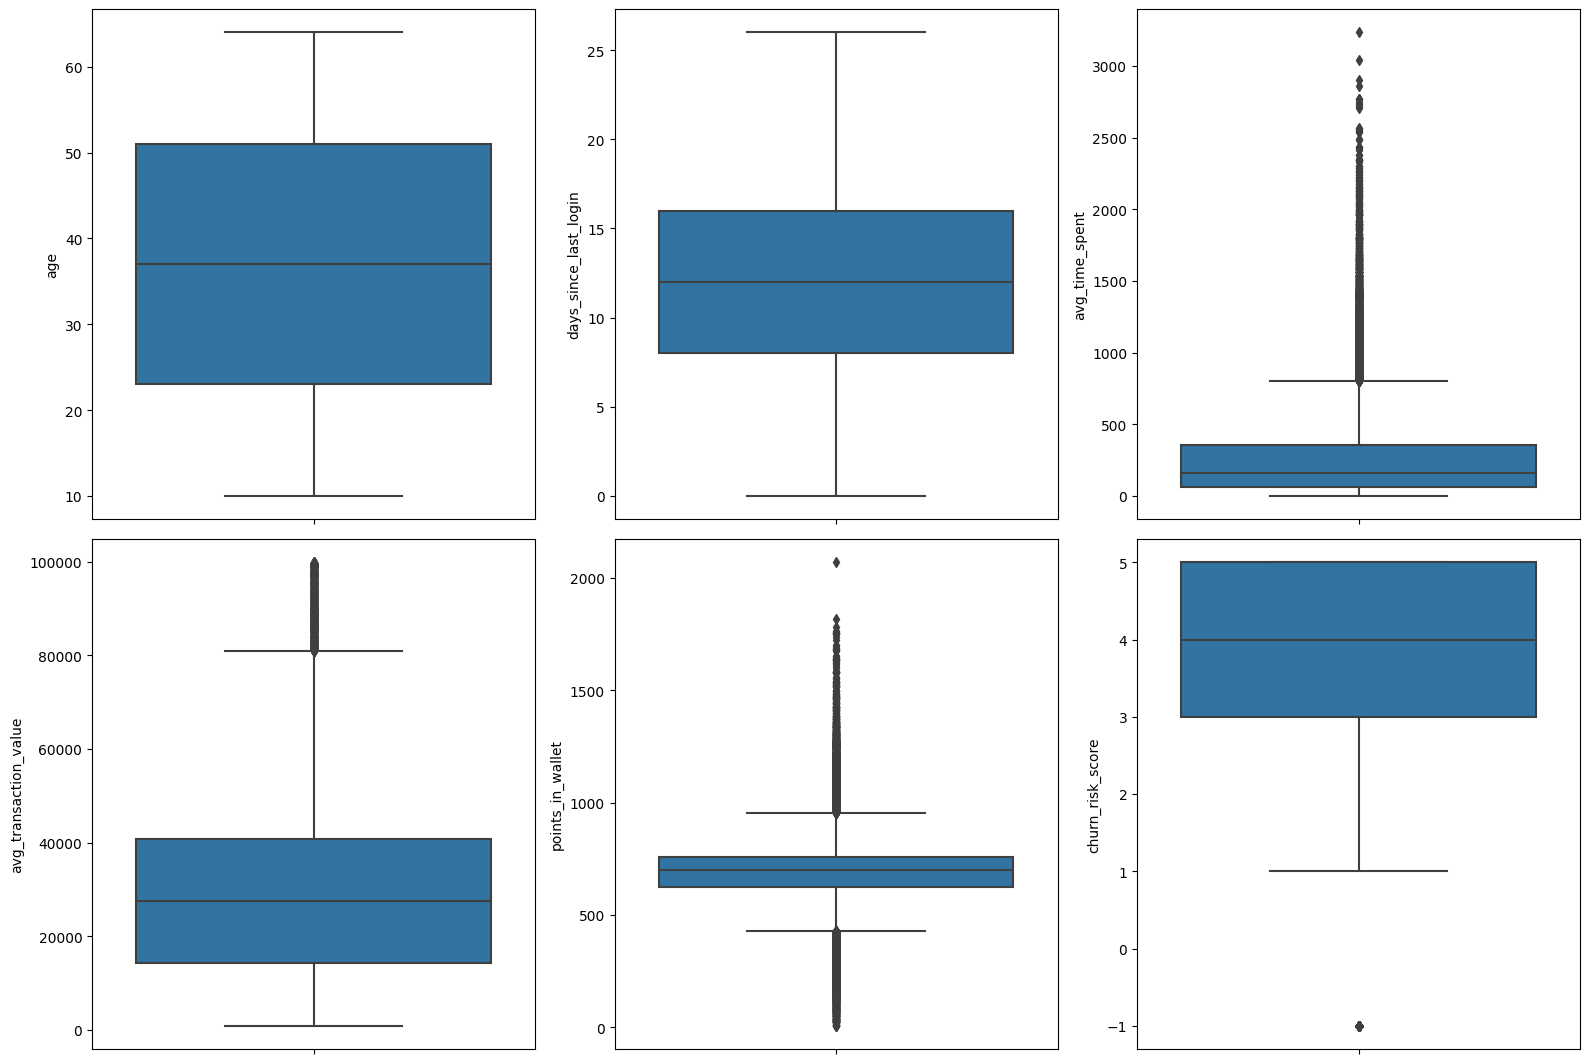

In [607]:
fig = plt.figure(figsize=(16,16))
for i in range(len(numerical_features)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=df[numerical_features[i]])
plt.tight_layout()
plt.show()

In [608]:
df.shape

(36992, 21)

In [609]:
df.describe()

,age,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,days_since_joined
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,43343.395491,12.069096,279.147450,29271.194003,14.455576,691.118561,3.463397,2542.793063
std,15.867412,24934.420236,6.139792,329.947709,19444.806226,9.941579,177.194251,1.409661,317.860926
min,10.000000,0.000000,0.000000,0.000000,800.460000,-43.652702,6.432208,-1.000000,1998.000000
25%,23.000000,21852.000000,8.000000,60.102500,14177.540000,7.000000,625.597500,3.000000,2267.000000
50%,37.000000,43332.500000,12.000000,161.765000,27554.485000,14.000000,698.250000,4.000000,2542.000000
75%,51.000000,64859.250000,16.000000,356.515000,40855.110000,22.000000,757.002500,5.000000,2820.000000
max,64.000000,86399.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000,3093.000000


In [610]:
df['churn_risk_score']=df['churn_risk_score'].replace(-1, 5)

In [611]:
df['churn_risk_score'].value_counts()

churn_risk_score
5    10990
3    10424
4    10185
2     2741
1     2652
Name: count, dtype: int64

# Feature enginerring

In [612]:
X=df.drop('churn_risk_score', axis=1).copy()
X.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,days_since_joined
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Both,Wi-Fi,58082,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2134
1,32,F,City,Premium Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,45493,16,306.34,12838.38,10.0,698.25,Yes,No,Yes,Solved,Quality Customer Care,2123
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,82401,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,2413
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,57470,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,2426
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,56804,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,2108


In [613]:
y=df['churn_risk_score'].copy()

### One-hot Encoding

In [614]:
from sklearn.preprocessing import StandardScaler

In [615]:
# Todo: Normalize your data
numerical_features = [feature for feature in X.columns if ((X[feature].dtypes != 'O'))]
categorical_features = [feature for feature in X.columns if ((X[feature].dtypes == 'object'))]

In [616]:
X_cat_scaled=pd.get_dummies(X[categorical_features],columns=categorical_features).astype('int')

X=pd.concat([X[numerical_features],X_cat_scaled],axis=1)
scaler=StandardScaler()
X[numerical_features]=scaler.fit_transform(X[numerical_features])

In [617]:
X.shape

(36992, 50)

In [618]:
X.head()

,age,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,days_since_joined,gender_F,gender_M,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,-1.204886,0.591103,0.803117,0.065110,1.220602,0.255941,0.511488,-1.286093,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.322562,0.086211,0.640243,0.082416,-0.845112,-0.448182,0.040247,-1.320699,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.433715,1.566434,0.314494,0.718343,-0.423985,0.758886,-1.074703,-0.408338,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.007447,0.566558,-0.174128,-0.684595,-0.207340,-0.850538,-0.696751,-0.367439,0,1,...,1,0,0,0,1,0,0,0,0,0
4,-0.385585,0.539848,1.291739,-0.503170,-0.246215,0.155352,-0.158351,-1.367890,1,0,...,0,0,0,0,1,0,0,0,0,0


In [619]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 223
TRAIN_SIZE = 0.3

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

Accuracy: 0.72902104653408
Akurasi model SVM 72.90 %
Report Metrics SVM 
               precision    recall  f1-score   support

           1       0.55      1.00      0.71      1861
           2       0.98      0.26      0.41      1930
           3       0.85      0.92      0.88      7260
           4       0.78      0.37      0.50      7137
           5       0.67      0.94      0.78      7707

    accuracy                           0.73     25895
   macro avg       0.77      0.70      0.66     25895
weighted avg       0.77      0.73      0.70     25895

Confuction Matrix SVM 


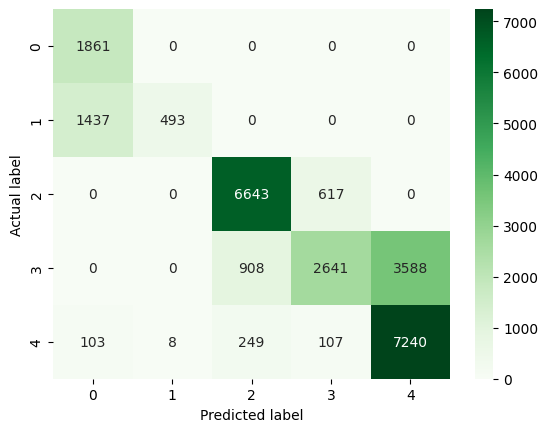

In [622]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Xây dựng pipeline với StandardScaler và mô hình SVM
pipeline = make_pipeline(StandardScaler(), SVC())
# Tạo một dict chứa các giá trị để tinh chỉnh
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.1, 1.0, 10.0],
    'svc__gamma': ['scale', 'auto']
}

# Tạo GridSearchCV để tìm kiếm các tham số tốt nhất
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Huấn luyện mô hình với tìm kiếm lưới
grid_search.fit(trainX, trainY)

# Lấy mô hình tốt nhất từ tìm kiếm lưới
best_model = grid_search.best_estimator_

# Dự đoán nhãn cho dữ liệu kiểm tra
predY = best_model.predict(testX)

# Đánh giá mô hình
accuracy = accuracy_score(testY, predY)
print('Accuracy:', accuracy)
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

Accuracy: 0.7269357018729484
Akurasi model SVM 72.69 %
Report Metrics SVM 
               precision    recall  f1-score   support

           1       0.55      1.00      0.71      1861
           2       0.98      0.26      0.41      1930
           3       0.85      0.91      0.88      7260
           4       0.78      0.36      0.50      7137
           5       0.67      0.94      0.78      7707

    accuracy                           0.73     25895
   macro avg       0.77      0.69      0.65     25895
weighted avg       0.76      0.73      0.70     25895

Confuction Matrix SVM 


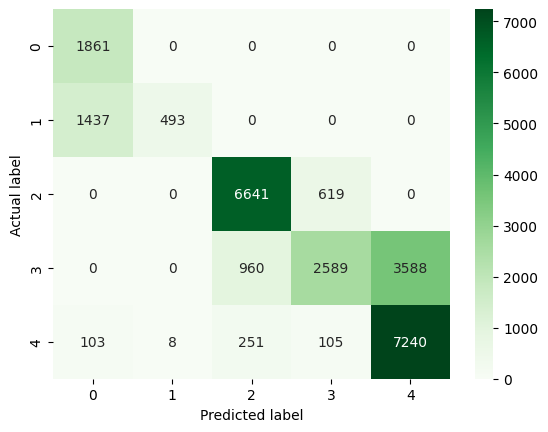

In [621]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Chuẩn bị dữ liệu
# X_train, X_test: Dữ liệu đầu vào cho huấn luyện và kiểm tra
# y_train, y_test: Nhãn tương ứng cho huấn luyện và kiểm tra

# Xây dựng pipeline với StandardScaler và mô hình SVM
pipeline = make_pipeline(StandardScaler(), SVC(kernel= 'linear', C=1.0, gamma='scale'))

# Huấn luyện mô hình
pipeline.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu kiểm tra
predY = pipeline.predict(testX)

# Đánh giá mô hình
accuracy = accuracy_score(testY, predY)
print('Accuracy:', accuracy)
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()
